# Homework 1

**Inhalt:** Datensets explorieren, filtern, Felder erstellen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Review und Übung

# Das Beispiel

Fussballstadien

Quelle/Beschreibung: http://opisthokonta.net/?cat=34

Laden Sie das File von hier herunter: http://opisthokonta.net/wp-content/uploads/2015/03/stadiums_20150302.csv

Speichern Sie das Datenfile an einem geeigneten Ort.

(zum Beispiel in einem Unterordner `dataprojects/stadiums`)

## Vorbereitung

Importieren Sie die benötigten Libraries und stellen Sie die richtigen Settings für Matplotlib ein.

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

## Daten laden

Öffnen Sie das Datenfile in Pandas

In [4]:
path = 'dataprojects/stadiums/stadiums_20150302.csv'

df = pd.read_csv(path)

Untersuchen Sie die Struktur der Daten: Länge, Datenfelder, erste Zeilen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
Team         164 non-null object
FDCOUK       164 non-null object
City         163 non-null object
Stadium      164 non-null object
Capacity     164 non-null int64
Latitude     164 non-null float64
Longitude    164 non-null float64
Country      164 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 10.3+ KB


In [6]:
df.head()

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England


Sind die Daten vollständig?

In [7]:
#sieht so aus. 

SyntaxError: invalid syntax (<ipython-input-7-68eaa794aaf2>, line 1)

## Einfache Auswertungen

Welche Länder sind in der Datenbank vertreten?

In [8]:
df['Country'].value_counts()

England     72
France      26
Spain       25
Germany     23
Scotland    18
Name: Country, dtype: int64

Wie viele Stadien sind pro Land in der Datenbank?

In [10]:
#siehe oben

In welchen fünf Städten stehen am meisten Fussballstadien?

In [11]:
df['City'].value_counts().head(5)

London         9
Glasgow        3
Madrid         3
Birmingham     2
Seville        2
Name: City, dtype: int64

Wie viele Stadien stehen östlich von Greenwich (also dem Null-Meridian)?

In [27]:
df[df['Longitude'] > 0].count()

Team         52
FDCOUK       52
City         52
Stadium      52
Capacity     52
Latitude     52
Longitude    52
Country      52
dtype: int64

## Ranglisten

Welche zehn Clubs haben die grössten Stadien?

In [50]:
df.sort_values('Capacity', ascending = False).head()

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany


Erstellen Sie eine neue Spalte ("Bezeichnung"), die den Teamnamen und das Stadion enthält (z.B. "Barcelona: Camp Nou")

Hint: Man kann Serien mit Text-Content genauso wie Serien mit Zahlen-Content addieren.

In [63]:
df['Bezeichnung'] = df['Team'] + ": " + df['Stadium']

Speichern Sie die zehn Clubs mit den grössten Stadien in einem separaten Dataframe.

In [64]:
top_10 = df.sort_values('Capacity', ascending = False).head(10)
top_10

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain,Barcelona : Camp Nou
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid : Santiago Bernabéu
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany,Borussia Dortmund : Signal Iduna Park
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England,Manchester United : Old Trafford
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany,Hertha BSC : Olympiastadion
64,Bayern Munich,Bayern Munich,Munich,Allianz Arena,71000,48.218775,11.624753,Germany,Bayern Munich : Allianz Arena
76,Schalke 04,Schalke 04,Gelsenkirchen,Veltins-Arena,61673,51.554503,7.067589,Germany,Schalke 04 : Veltins-Arena
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland,Celtic : Celtic Park
77,VfB Stuttgart,Stuttgart,Stuttgart,Mercedes-Benz Arena,60441,48.792269,9.232031,Germany,VfB Stuttgart : Mercedes-Benz Arena
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England,Arsenal : Emirates Stadium


Erstellen Sie einen horizontalen Barchart mit der Stadion-Bezeichnung und der Kapazität.

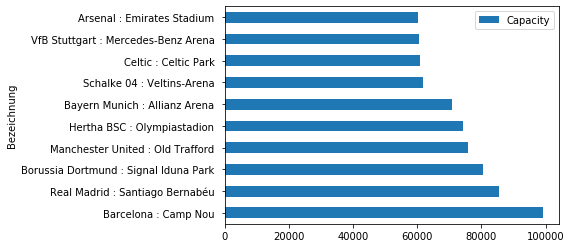

In [73]:
top_10.plot(kind='barh', x = 'Bezeichnung', y = 'Capacity')

## Gruppierte Auswertung

Ordnen Sie die Länder nach der Durchschnittsgrösse der Stadien.

Welches sind die grössten drei Stadien östlich des Null-Meridians?

Welches sind die grössten drei Stadien westlich des Null-Meridians?

Erstellen Sie ein Dataframe, das ausschliesslich die Stadien in London und Madrid enthält.

Bei den Städten hat es zT Leerschläge drin. Führen Sie folgenden Code aus, um sie zu entfernen:

Erstellen Sie ein Dataframe, das nur die Stadien aus Madrid und Glasgow enthält.

Vergleichen Sie die Stadien der beiden Städe anhand des Medianwerts.

## Ein Histogramm

Wie ist die Verteilung der Stadiongrösse? Zeichnen Sie ein Histogramm mit genügend feiner Aufgliederung.

## Ein hübscher Scatterplot

Man würde das normalerweise anders machen, aber da wir hier schon die Koordinaten haben...

- Definieren Sie einen Parameter "area" für die Punktegrösse, der sich an der Kapazität orientiert.

- Und plotten sie die Stadien auf einer "Landkarte" (Longitude auf der x-Achse, Latitude auf der y-Achse)